In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/cities.csv")
df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


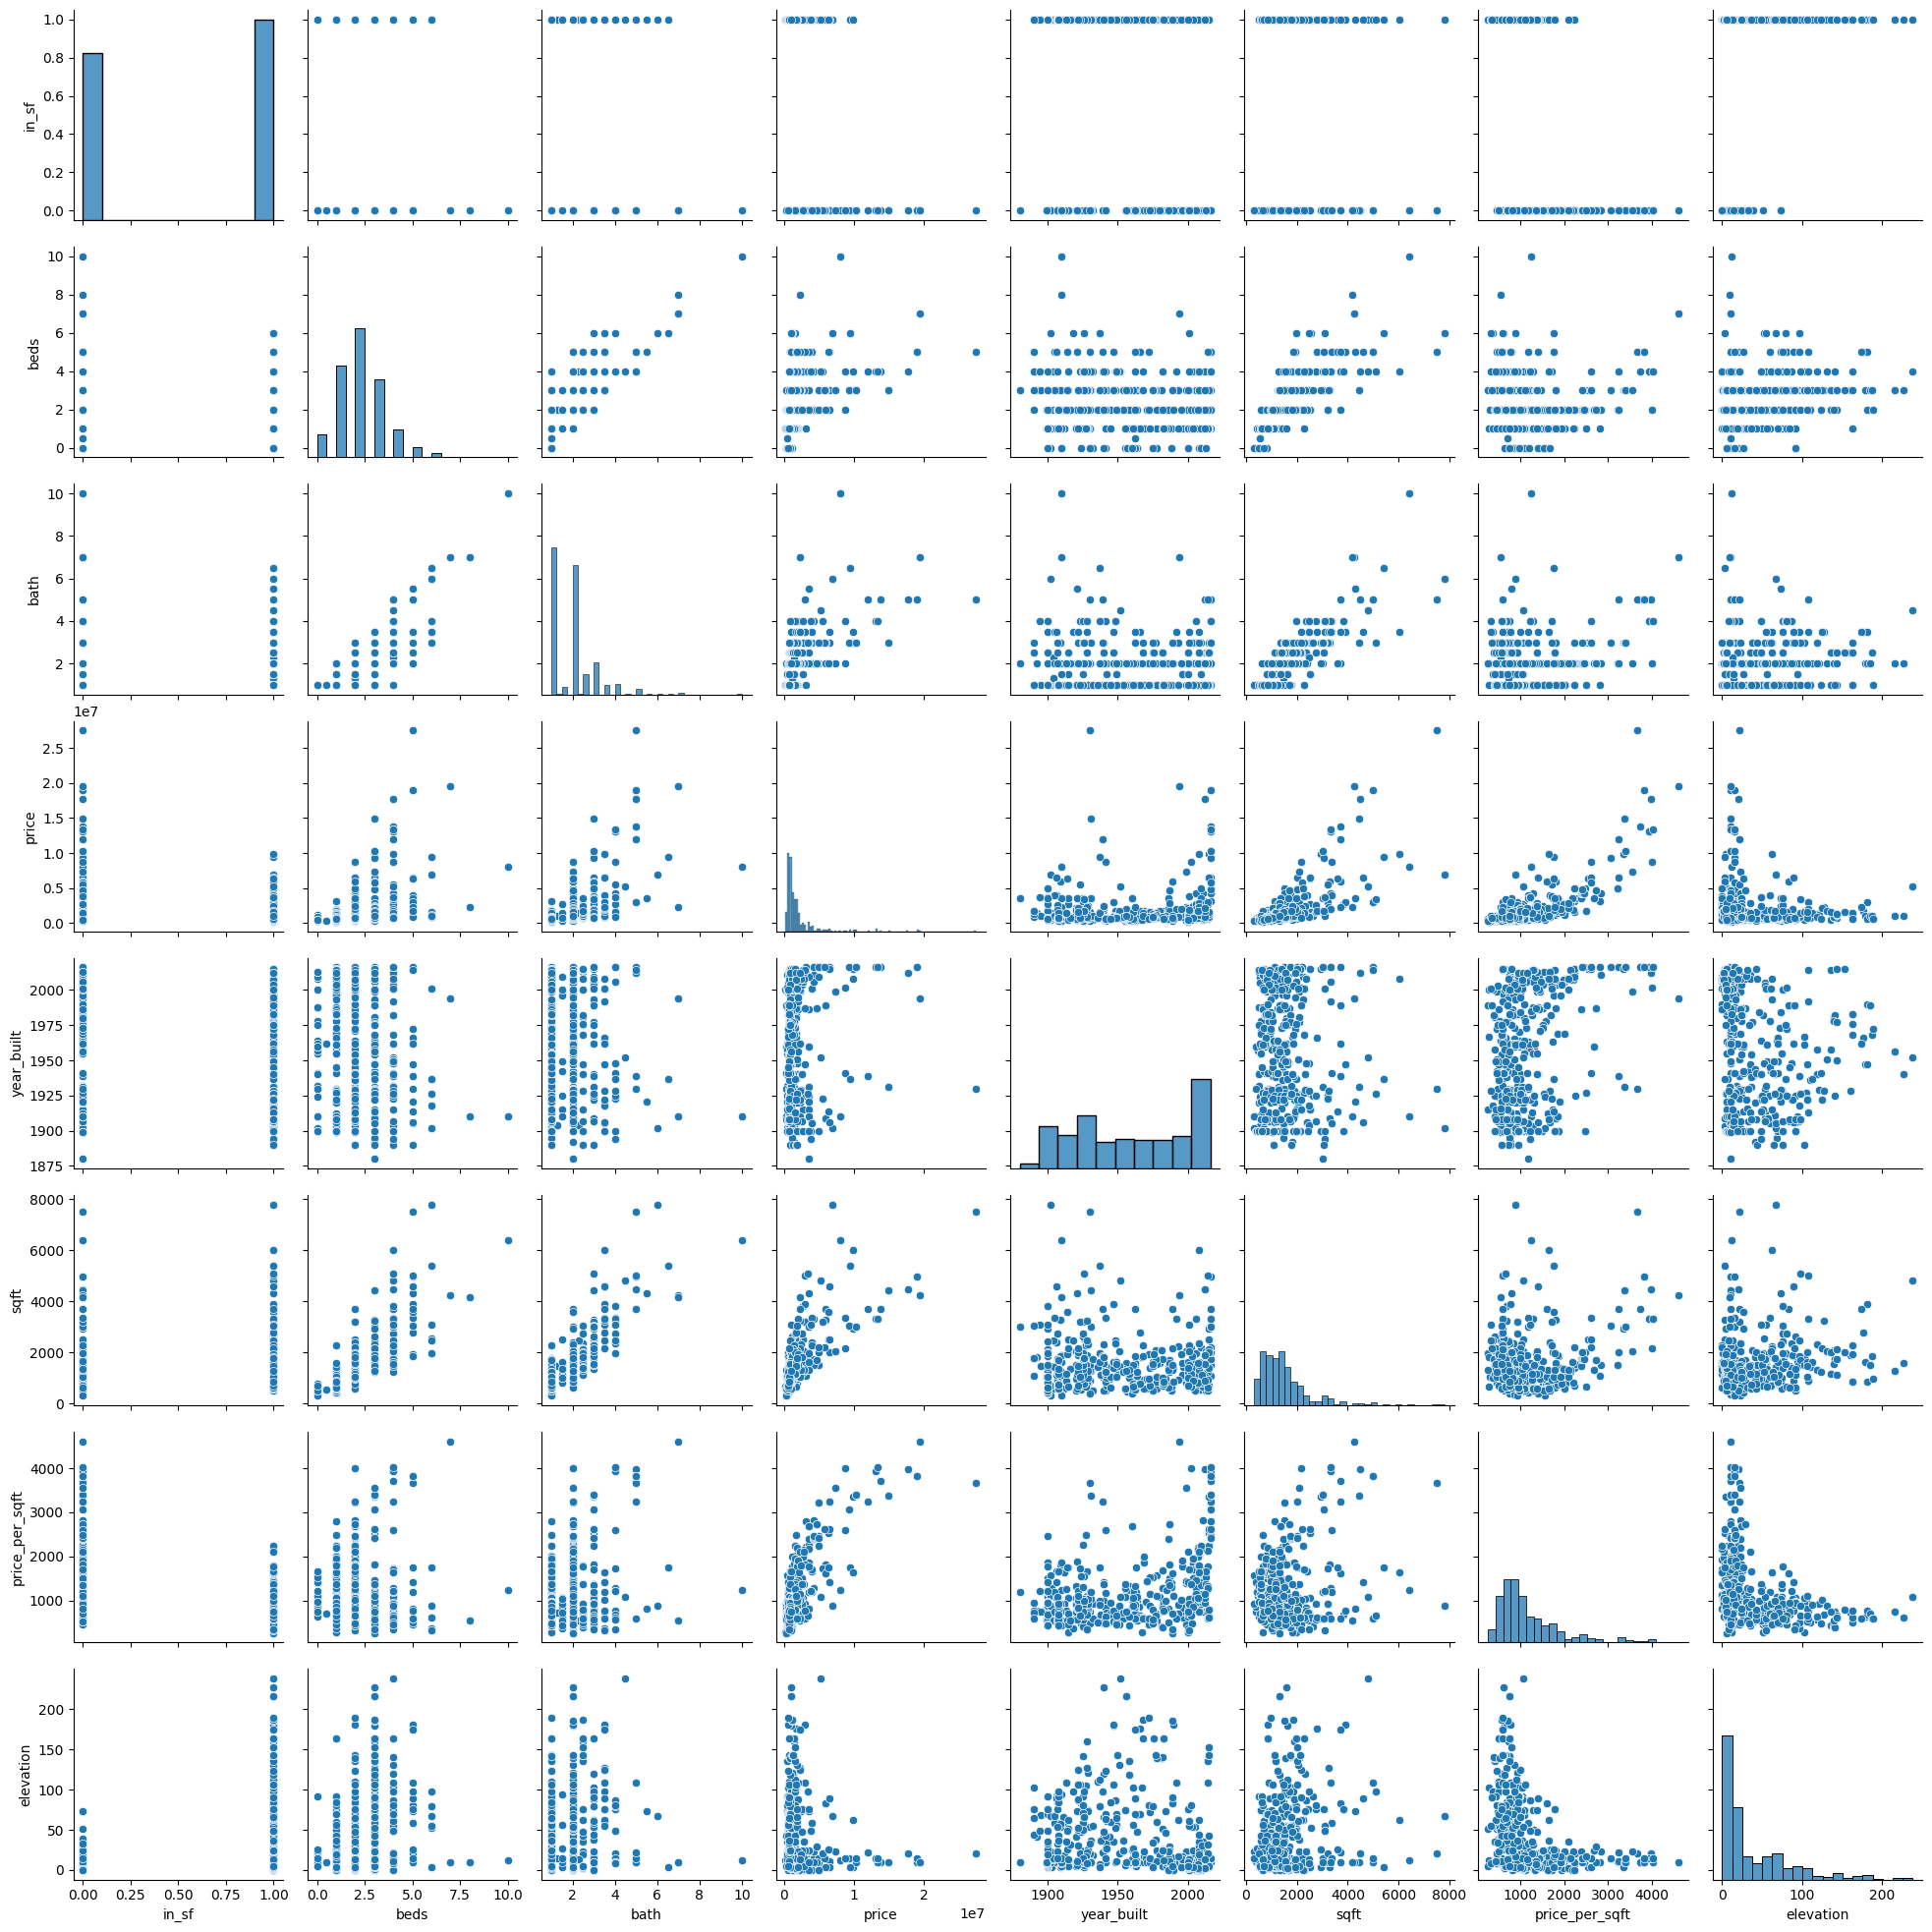

In [4]:
sns.pairplot(df)

<Axes: >

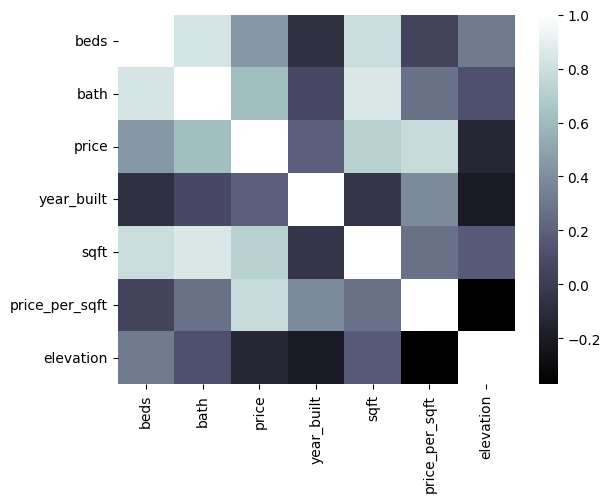

In [5]:
vars = df.iloc[:, 1:]
mycorr = vars.corr()
sns.heatmap(mycorr, cmap='bone')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [7]:
# Assuming the first column is the target variable
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
y_train

377    1
124    0
419    1
417    1
172    0
      ..
106    0
270    1
348    1
435    1
102    0
Name: in_sf, Length: 393, dtype: int64

In [14]:
clf = DecisionTreeClassifier(max_depth=2)
model = clf.fit(X_train, y_train)

In [15]:
target_names = ['NY','SF']
feature_names = []
for colname in df.columns[1:]:
    feature_names.append(colname)

In [23]:
feature_names

['beds', 'bath', 'price', 'year_built', 'sqft', 'price_per_sqft', 'elevation']

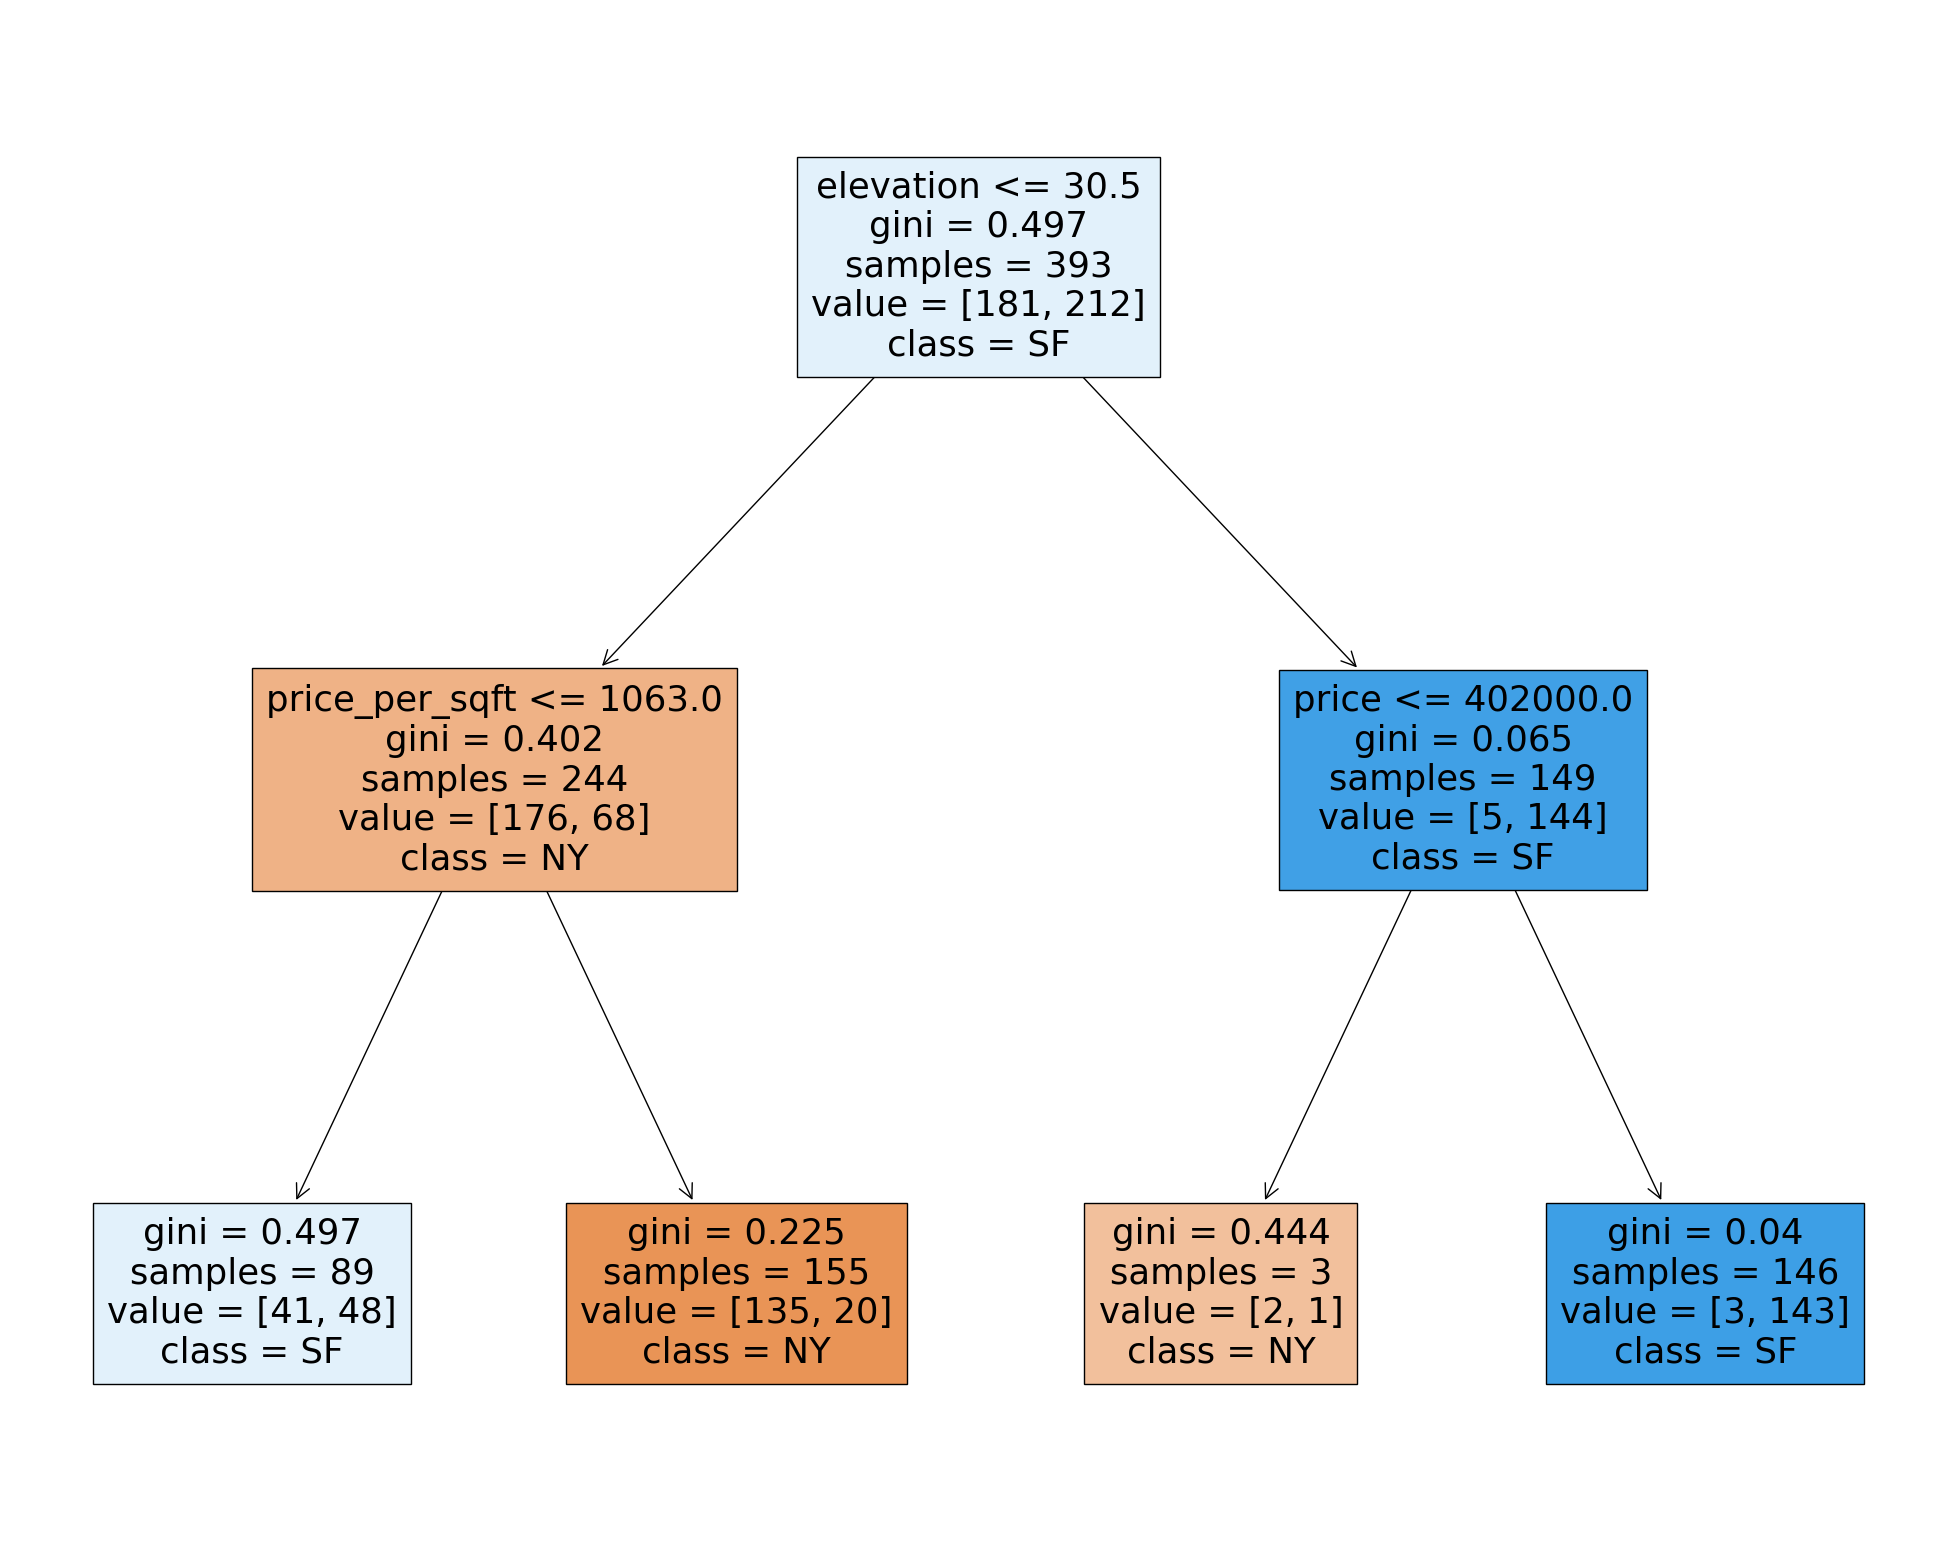

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

In [24]:
imp = model.feature_importances_
foo = pd.DataFrame(feature_names, imp)
foo

,0
0.000000,beds
0.000000,bath
0.022516,price
0.000000,year_built
0.000000,sqft
0.174626,price_per_sqft
0.802857,elevation


In [25]:
def metrics(model):
    from sklearn.metrics import confusion_matrix, roc_curve, auc
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    tree_predicted = model.predict(X_test)
    confusion = confusion_matrix(y_test, tree_predicted)
    y_score = model.fit(X_train, y_train).predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr, tpr, lw=3, label='ROC curve (area = {:0.2f})'.format(roc_auc))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (classifier)', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    #plt.axes().set_aspect('equal')
    plt.show()
    # Accuracy = TP + TN / (TP + TN + FP + FN) - maximise correct predictions overall
    # Precision = TP / (TP + FP) - minimise false positives 
    # Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate - minimise false negatives
    # F1 = 2 * Precision * Recall / (Precision + Recall) 
    # specificity = fp / (fp + tp)
    # recall = where consequences of false negatives could be high. medicine, law
    # precision = where consequences of false positives could be high (poor prediction -> customer dissatisfaction)
    # F1 combines precision and recall with a param beta for weighting either way.
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
    print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
    print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
    print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))
    print('Confusion matrix \n', confusion)

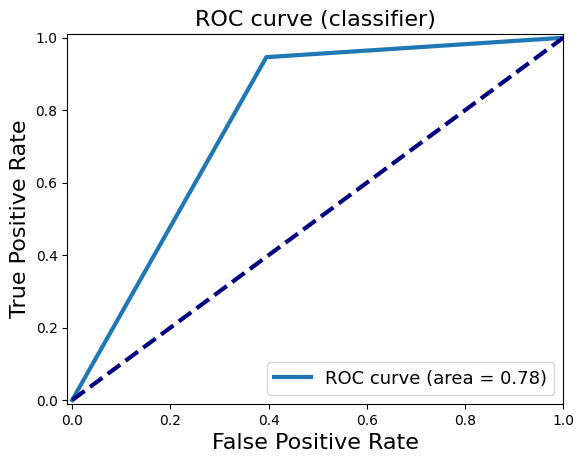

Accuracy: 0.80
Precision: 0.76
Recall: 0.95
F1: 0.84
Confusion matrix 
 [[26 17]
 [ 3 53]]


In [26]:
metrics(clf)